# Movie Recommendation System using Pandas from Scratch :

In [34]:
# Import library :
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Get tha Dataset: 

In [3]:
#To read this file:

In [4]:
columns_name = ['user_id','item_id','rating','timestamp']

df = pd.read_csv("D:\Data Analytics\pandas Dataset\ml-100k/u.data", sep='\t', names=columns_name)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].nunique()

1682

# Get 2nd Dataset: 

In [8]:
movies_titles = pd.read_csv("D:\Data Analytics\pandas Dataset\ml-100k/u.item", sep="|", header=None, encoding="latin1")

In [9]:
movies_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
movies_titles.shape

(1682, 24)

In [11]:
movies_titles = movies_titles[[0,1]]

In [12]:
movies_titles.columns = ['item_id','movie_title']

In [13]:
movies_titles.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merge Datasets:-

In [14]:
# Merge the two Dataset:
join = pd.merge(df, movies_titles, on='item_id')

In [15]:
join.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Exploratory data Analysis: EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [17]:
# To print highest rating or review of movies name

join.groupby('movie_title').mean()['rating'].sort_values(ascending=False).head()

movie_title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [18]:
# To find how many times any movies being watch....(means to count highest movie)

In [19]:
join.groupby('movie_title').count()['rating'].sort_values(ascending=False)

movie_title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

# To create Dataframe:

In [20]:
rating = pd.DataFrame(join.groupby('movie_title').mean()['rating'].sort_values(ascending=False))

In [21]:
rating.head()

,rating
movie_title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [22]:
rating['no of ratings'] = pd.DataFrame(join.groupby('movie_title').count()['rating'])

In [23]:
rating.sort_values(by='rating', ascending=False)

,rating,no of ratings
movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"I, Worst of All (Yo, la peor de todas) (1990)",1.0,1
"Woman in Question, The (1950)",1.0,1
Vermont Is For Lovers (1992),1.0,1


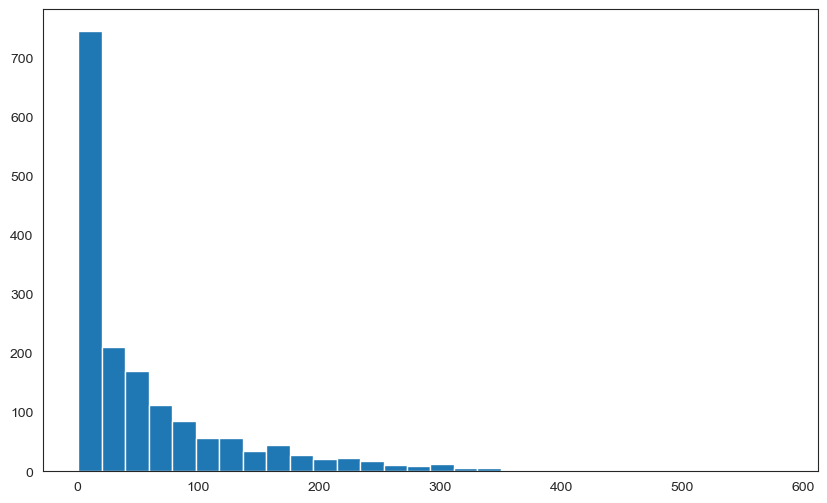

In [24]:
# To plot the histogram:

plt.figure(figsize=(10,6))
plt.hist(rating['no of ratings'], bins=30)
plt.show()

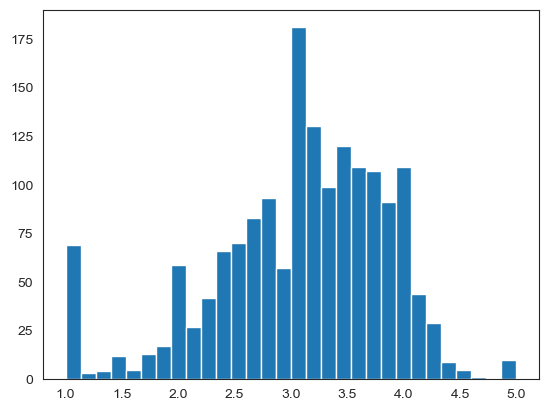

In [25]:
plt.hist(rating['rating'], bins=30)
plt.show()

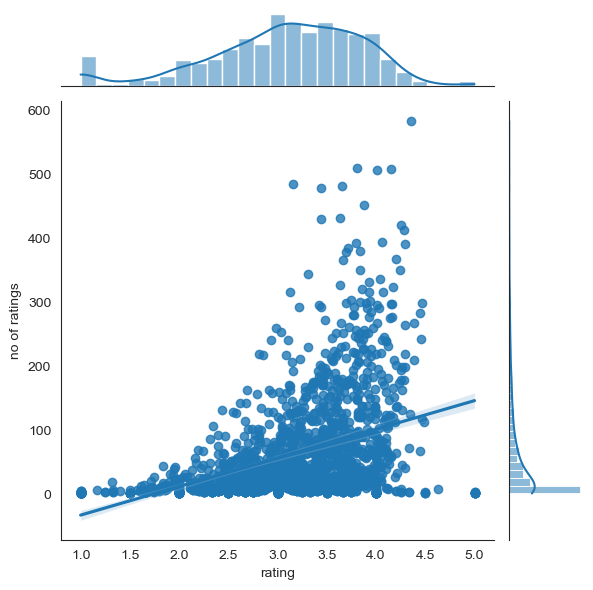

In [26]:
# Jointplot :
sns.jointplot(x='rating', y='no of ratings' , data=rating, kind='reg')

In [27]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Creating Movie Recommendation system:

In [28]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [29]:
rating.head()

,rating,no of ratings
movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [30]:
join.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [31]:
moviemat = join.pivot_table(index='user_id', columns="movie_title", values='rating')

In [32]:
moviemat.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [33]:
join["rating"].unique()

array([3, 5, 4, 2, 1], dtype=int64)